## <span style="color:blue">**Problem Statement**:</style>


<span style="color:green;font-size:17px">**About Company:**</style>

<span style="font-size:14px;font-family:HelveticsNeue">Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.</style>


<span style="font-size:17px;color:green">**Problem:**</style>

<span style="font-size:14px;font-family:HeleveticsNeue">Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.</style>


<span style="color:blue">**Data Variable Description:** </style>

    * Loan_ID - Unique Loan ID
    * Gender - Male/ Female
    * Married - Applicant married (Y/N)
    * Dependents - Number of dependents
    * Education - Applicant Education (Graduate/ Under Graduate)
    * Self_Employed - Self employed (Y/N)
    * ApplicantIncome - Applicant income
    * CoapplicantIncome - Coapplicant income
    * LoanAmount - Loan amount in thousands
    * Loan_Amount_Term - Term of loan in months
    * Credit_History - credit history meets guidelines
    * Property_Area - Urban/ Semi Urban/ Rural
    * Loan_Status - Loan approved (Y/N)

    * Volume of data: 614 
    * Target Variable: Loan_Status

In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from statistics import stdev
import math
from scipy import stats
from operator import add
from scipy.stats import norm, skew #for some statistics

%matplotlib inline

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x)) #Limiting floats output to 2 decimal points
##Igonre all warnings generated by seaborn and other packages
import warnings
warnings.filterwarnings('ignore')
#plotly.offline doesn't push your charts to the clouds
import plotly.offline as pyo
#allows us to create the Data and Figure objects
from plotly.graph_objs import *
#plotly.plotly pushes your charts to the cloud  
#import plotly.plotly as py

#pandas is a data analysis library
import pandas as pd
from pandas import DataFrame
pyo.init_notebook_mode()

In [2]:
# Pipeline and machine learning algorithms
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Model fine-tuning and evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection
from sklearn import metrics 

from sklearn.metrics import confusion_matrix, recall_score, precision_score, precision_recall_curve
from sklearn.metrics import auc, roc_curve, roc_auc_score, classification_report, f1_score
from sklearn.metrics import cohen_kappa_score, average_precision_score
#####StratifiedKFold + Shuffle######
from sklearn.utils import shuffle
from sklearn.cross_validation import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

In [3]:
model_metric_cols = ['Model Name', 'Train-Precision','Test-Precision', 'Train-ROC-AUC', 'Test-ROC-AUC', 'Train-F1 Score','Test-F1 Score']
model_metric = pd.DataFrame(columns=model_metric_cols)

def fill_model_metric(model, X_train, X_test, model_name):
    yt_pred=model.predict(X_train)
    yv_pred=model.predict(X_test)

    pr_train = precision_score(y_train, yt_pred)  
    pr_test = precision_score(y_test, yv_pred)  

    f1_train = f1_score(y_train, yt_pred) 
    f1_test = f1_score(y_test, yv_pred) 
    
#     y_train_np = np.array(y_train)
#     yt_pred_np = np.array(yt_pred)
#     y_test_np = np.array(y_test)
#     yv_pred_np = np.array(yv_pred)
    
#     rocauc_train = roc_auc_score(y_train_np, yt_pred_np)
#     rocauc_test = roc_auc_score(y_test_np, yv_pred_np)

    # predict probabilities
    yt_probs = model.predict_proba(X_train)[:,1]
    yv_probs = model.predict_proba(X_test)[:,1]
# keep probabilities for the positive outcome only
    y_train_np = np.array(y_train)
    yt_pred_np = np.array(yt_probs)
    y_test_np = np.array(y_test)
    yv_pred_np = np.array(yv_probs)
    
    rocauc_train = roc_auc_score(y_train_np, yt_pred_np)
    rocauc_test = roc_auc_score(y_test_np, yv_pred_np)

    index = model_metric.shape[0]
    model_metric.loc[index, 'Model Name'] = model_name
    model_metric.loc[index, 'Train-Precision'] = pr_train  
    model_metric.loc[index, 'Test-Precision'] = pr_test
    model_metric.loc[index, 'Train-ROC-AUC'] = rocauc_train  
    model_metric.loc[index, 'Test-ROC-AUC'] = rocauc_test
    model_metric.loc[index, 'Train-F1 Score'] = f1_train
    model_metric.loc[index, 'Test-F1 Score'] = f1_test    
    return model_metric, yt_pred, yv_pred

In [4]:
def plot_model_metrics():
    COLS = ['Model Name', 'Test-Precision', 'Test-ROC-AUC', 'Test-F1 Score']
    metric_test = model_metric[(COLS)]

    Metrics = metric_test.melt('Model Name', var_name='Metric', value_name='Score')
# Metrics.set_index('ModelName', inplace=True)

    plt.figure(figsize=(18,8))
    ax=sns.barplot(x='Model Name', y='Score', hue='Metric', data=Metrics)
# set title and labels for axes
    ax.set(xlabel="Algorithm", ylabel="Score (%)", title="Machine Learning Algorithm Accuracy Score")
    ax.set_ylim([0, 1.0])
    models = model_metric['Model Name'].tolist()
    tick_marks = np.arange(len(models))
    plt.xticks(tick_marks, models, rotation=45)    

In [5]:
## first make a model function for modeling with confusion matrix
def plot_CM_ROC_PR(model,X_test,y_test, model_name):
    pred=model.predict(X_test)
    cnf_matrix=confusion_matrix(y_test,pred)

# keep probabilities for the positive outcome only
    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)  


    ap = average_precision_score(y_test, probs)
    precision, recall, _ = precision_recall_curve(y_test, probs)
    
    fig = plt.figure(figsize=(20,6))
    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    ax3 = fig.add_subplot(1, 3, 3)

    title = model_name + ' - Confusion Matrix, ROC Curve and Precision-Recall Curve'
    fig.suptitle(title, fontsize=20)
    
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5, fmt='.1f', annot_kws={"size": 15}, ax=ax1)
    ax1.set_title('OT Confusion Matrix - Test Data', color='r', fontsize=15)
    ax1.set_xlabel("Predicted Class", color='b', fontsize=15)
    ax1.set_ylabel("Real Class", color='b', fontsize=15)

    ax2.plot(fpr, tpr, label='ROC curve', color='green')
    ax2.plot([0, 1], [0, 1], 'k--', label='Random guess', color='navy')
    _ = ax2.set_xlabel('False Positive Rate', color='b', fontsize=15)
    _ = ax2.set_ylabel('True Positive Rate', color='b', fontsize=15)
    _ = ax2.set_title('ROC Curve', color='r', fontsize=15)
    _ = ax2.set_xlim([-0.02, 1])
    _ = ax2.set_ylim([0, 1.02])
    _ = ax2.legend(loc="lower right")

    ax3.step(recall, precision, color='r', alpha=0.2, where='post')
    ax3.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    ax3.set_xlabel('Recall', color='b', fontsize=15)
    ax3.set_ylabel('Precision', color='b', fontsize=15)
    ax3.set_ylim([0.0, 1.05])
    ax3.set_xlim([0.0, 1.0])
    ax3.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(ap), color='r', fontsize=15) 
    
    fig

In [6]:
ChiSquare_col = ['Field','P-Value','Alpha', 'ChiTest','Dof', 'Result']
ChiSquare_var = pd.DataFrame(columns=ChiSquare_col)
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        ChiSquare_var = ''
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result = 'INCLUDE'
        else:
            result = 'NOT INCLUDE'
            
        index = ChiSquare_var.shape[0]
        ChiSquare_var.loc[index, 'Field'] = colX
        ChiSquare_var.loc[index, 'P-Value'] = self.p   
        ChiSquare_var.loc[index, 'Alpha'] = alpha  
        ChiSquare_var.loc[index, 'ChiTest'] = self.chi2
        ChiSquare_var.loc[index, 'Dof'] = self.dof
        ChiSquare_var.loc[index, 'Result'] = result
        return ChiSquare_var
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

In [7]:
### Correlation Plots function
def Correlation_Plot(df, title):
##Collecting All Numerical variables to Plot the Correlation
    num_vars = df.dtypes[df.dtypes != "object"].index
    df_num = df[num_vars]    
    colormap = plt.cm.RdBu
    plt.figure(figsize=(22,12))
    plt.title(title, y=1.05, size=16)

    mask = np.zeros_like(df_num .corr())
    mask[np.triu_indices_from(mask)] = True

    svm = sns.heatmap(df_num .corr(), mask=mask, linewidths=0.2,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
    plt.show()
def prepare_plot(data,X='Week',Y='Sales',title='Weekly Sales Chart',xtitle='Weeks',ytitle='Sales (thousands)'):
    trace={'name':Y,
       'type':'scatter',
        'mode':'lines',
          'x':list(data.index),
           'y':data[Y]}
    data=Data([trace])
    layout={'title':title,
            'xaxis':{'title':xtitle},
             'yaxis':{'title':ytitle}}
    fig=Figure(data=data,layout=layout)
    return fig

In [8]:
data=pd.read_csv("./Data/train_loan_prediction.csv")
data=data.set_index('Loan_ID')
data.info()
print("Total data volume is ",data.shape[0])

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB
Total data volume is  614


In [9]:
data.head(10)

Gender Married Dependents     Education Self_Employed  \
Loan_ID                                                          
LP001002   Male      No          0      Graduate            No   
LP001003   Male     Yes          1      Graduate            No   
LP001005   Male     Yes          0      Graduate           Yes   
LP001006   Male     Yes          0  Not Graduate            No   
LP001008   Male      No          0      Graduate            No   
LP001011   Male     Yes          2      Graduate           Yes   
LP001013   Male     Yes          0  Not Graduate            No   
LP001014   Male     Yes         3+      Graduate            No   
LP001018   Male     Yes          2      Graduate            No   
LP001020   Male     Yes          1      Graduate            No   

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                                                      
LP001002             5849               0.00         nan            360.00   
LP001003             4583            1508.00      128.00            360.00   
LP001005             3000               0.00       66.00            360.00   
LP001006             2583            2358.00      120.00            360.00   
LP001008             6000               0.00      141.00            360.00   
LP001011             5417            4196.00      267.00            360.00   
LP001013             2333            1516.00       95.00            360.00   
LP001014             3036            2504.00      158.00            360.00   
LP001018             4006            1526.00      168.00            360.00   
LP001020            12841           10968.00      349.00            360.00   

          Credit_History Property_Area Loan_Status  
Loan_ID                                             
LP001002            1.00         Urban           Y  
LP001003            1.00         Rural           N  
LP001005            1.00         Urban           Y  
LP001006            1.00         Urban           Y  
LP001008            1.00         Urban           Y  
LP001011            1.00         Urban           Y  
LP001013            1.00         Urban           Y  
LP001014            0.00     Semiurban           N  
LP001018            1.00         Urban           Y  
LP001020            1.00     Semiurban           N

##### Column as type of data-- loaded into it
| Column_Name       | Type of Variable | Missing Values | Type of Variable |
|-------------------|------------------|----------------|------------------|
| Loan_ID           | Unique ID        | 0              | object           |
| Gender            | Categorical      | 13             | object           |
| Married           | Categorical      | 3              | object           |
| Dependents        | Categorical      | 15             | object           |
| Education         | Categorical      | 0              | object           |
| Self_Employed     | Categorical      | 32             | object           |
| ApplicantIncome   | Continuous       | 0              | int64            |
| CoapplicantIncome | Continuous       | 0              | float64          |
| LoanAmount        | Continuous       | 22             | float64          |
| Loan_Amount_Term  | Continuous       | 14             | float64          |
| Credit_History    | Continuous       | 50             | float64          |
| Property_Area     | Categorical      | 0              | object           |
| Loan_Status       | Categorical      | 0              | object           |

In [10]:
### Check again is there any missing values?
data.apply(lambda x: sum(x.isnull()))

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Missing Value filling methodology
 - For Continuous Variables fill it with mean 
 - For Categorical variables fill it with most frequent value

In [11]:
def fill_with_most_freq(data,label):
    most_freq= list(data[label].value_counts().index)[0]
    data[label].fillna(most_freq,inplace=True)
    return data[label]

def fill_with_mean_value(data,label):
    mean_val=data[label].mean()
    data[label].fillna(mean_val,inplace=True)
    return data[label]

def generate_dummy(data,label):
    dummy=pd.get_dummies(data[label],prefix=label)
    dummy=dummy.iloc[:,0:-1]
    return dummy.copy()

def remove_outliers(data,label):
    print(label)
    q75, q25 = np.percentile(data[label], [75 ,25])
    iqr = q75-q25
    print("IQR",iqr)
    whisker = q75 + (1.5*iqr)
    print("Upper whisker",whisker)
    data[label] = data[label].clip(upper=whisker)
    return data[label].copy()

def prep_histogram(data,label):
    trace1={'name':label,
           'type':'histogram',
           'x':data[label]}
    data=Data([trace1])
    layout={'title':'Histogram of - '+label,
           'width':1000,
           'height':400}
    fig=Figure(data=data,layout=layout)
    #fig.add_trace(trace2)
    return fig
def prep_boxplot(data,label):
    trace1={'name':label,
           'type':'box',
           'x':data[label]}
    data=Data([trace1])
    layout={'title':'Boxplot of -'+label,
            'width':1000,
             'height':400}
    fig=Figure(data=data,layout=layout)
    return fig
def train_test_split(X, y):
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=9)
    sss.get_n_splits(X, y)
    StratifiedShuffleSplit(n_splits=1, random_state=9)
    for train_idx, test_idx in sss.split(X, y):
        X_train = X.iloc[train_idx]
        y_train = y.iloc[train_idx]
        X_test = X.iloc[test_idx]
        y_test = y.iloc[test_idx]
    return X_train, y_train, X_test, y_test

In [12]:
labels_missingval=['Gender','Married','Dependents','Self_Employed']
data_filled=data.copy()

for t in labels_missingval:
    data_filled[t]=fill_with_most_freq(data_filled,t)
    
labels_continuous=['LoanAmount','Loan_Amount_Term','Credit_History']    
for t in labels_continuous:
    data_filled[t]=fill_with_mean_value(data_filled,t)

In [13]:
num_vars =data_filled.dtypes[data_filled.dtypes != "object"].index
cat_vars= data_filled.dtypes[data_filled.dtypes=='object'].index
print(num_vars,cat_vars)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object') Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')


In [14]:
data_filled.apply(lambda x: sum(x.isnull()))

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
data_filled['EMI']= data_filled['LoanAmount']/data_filled['Loan_Amount_Term']
data_filled['Total_Income']= data_filled['ApplicantIncome']+data_filled['CoapplicantIncome']
data_filled['EMI/Income']=data_filled['EMI']/data_filled['Total_Income']
num_vars=[t for t in num_vars if t not in ['EMI','Total_Income','ApplicantIncome','CoapplicantIncome']]+['EMI/Income']
cat_vars=[t for t in cat_vars if t not in ['Loan_ID']]
print(num_vars,cat_vars)

['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'EMI/Income'] ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [16]:
data_filled.head(10)

Gender Married Dependents     Education Self_Employed  \
Loan_ID                                                          
LP001002   Male      No          0      Graduate            No   
LP001003   Male     Yes          1      Graduate            No   
LP001005   Male     Yes          0      Graduate           Yes   
LP001006   Male     Yes          0  Not Graduate            No   
LP001008   Male      No          0      Graduate            No   
LP001011   Male     Yes          2      Graduate           Yes   
LP001013   Male     Yes          0  Not Graduate            No   
LP001014   Male     Yes         3+      Graduate            No   
LP001018   Male     Yes          2      Graduate            No   
LP001020   Male     Yes          1      Graduate            No   

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                                                      
LP001002             5849               0.00      146.41            360.00   
LP001003             4583            1508.00      128.00            360.00   
LP001005             3000               0.00       66.00            360.00   
LP001006             2583            2358.00      120.00            360.00   
LP001008             6000               0.00      141.00            360.00   
LP001011             5417            4196.00      267.00            360.00   
LP001013             2333            1516.00       95.00            360.00   
LP001014             3036            2504.00      158.00            360.00   
LP001018             4006            1526.00      168.00            360.00   
LP001020            12841           10968.00      349.00            360.00   

          Credit_History Property_Area Loan_Status  EMI  Total_Income  \
Loan_ID                                                                 
LP001002            1.00         Urban           Y 0.41       5849.00   
LP001003            1.00         Rural           N 0.36       6091.00   
LP001005            1.00         Urban           Y 0.18       3000.00   
LP001006            1.00         Urban           Y 0.33       4941.00   
LP001008            1.00         Urban           Y 0.39       6000.00   
LP001011            1.00         Urban           Y 0.74       9613.00   
LP001013            1.00         Urban           Y 0.26       3849.00   
LP001014            0.00     Semiurban           N 0.44       5540.00   
LP001018            1.00         Urban           Y 0.47       5532.00   
LP001020            1.00     Semiurban           N 0.97      23809.00   

          EMI/Income  
Loan_ID               
LP001002        0.00  
LP001003        0.00  
LP001005        0.00  
LP001006        0.00  
LP001008        0.00  
LP001011        0.00  
LP001013        0.00  
LP001014        0.00  
LP001018        0.00  
LP001020        0.00

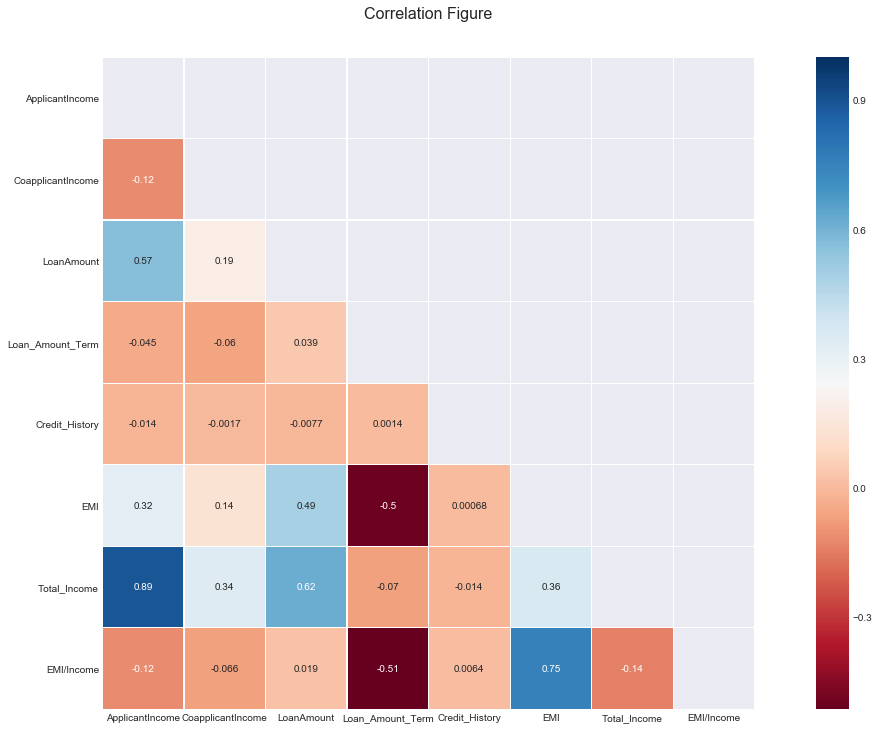

In [17]:
Correlation_Plot(data_filled,'Correlation Figure')

In [18]:
var='EMI/Income'
fig1 =prep_histogram(data_filled,var)
fig2 =prep_boxplot(data_filled,var)
pyo.iplot(fig1)
pyo.iplot(fig2)

Y    422
N    192
Name: Loan_Status, dtype: int64


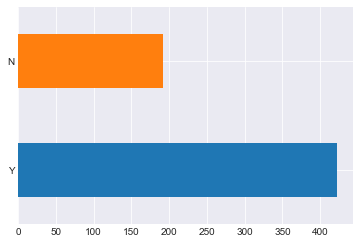

In [19]:
print(data_filled['Loan_Status'].value_counts())
data_filled['Loan_Status'].value_counts().plot(kind='barh')

In [20]:
lst_dummy_df=[]
for t in cat_vars:
    if t!='Loan_Status':
        #print("dummy_"+str(t))
        #tk="dummy_"+str(t)
        tk= generate_dummy(data_filled,t)
        lst_dummy_df.append(tk)
for t in num_vars:
    data_filled[t]=remove_outliers(data_filled,t)

data_continuous_df=data_filled[num_vars]
lst_dummy_df.append(data_continuous_df)
lst_dummy_df.append(data_filled['Loan_Status'])
new_data=pd.concat(lst_dummy_df,axis=1)
print(new_data.shape)
print(new_data.columns)

LoanAmount
IQR 64.5
Upper whisker 261.5
Loan_Amount_Term
IQR 0.0
Upper whisker 360.0
Credit_History
IQR 0.0
Upper whisker 1.0
EMI/Income
IQR 2.6224640449449698e-05
Upper whisker 0.00012131247006050936
(614, 14)
Index(['Gender_Female', 'Married_No', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Education_Graduate', 'Self_Employed_No',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'EMI/Income', 'Loan_Status'],
      dtype='object')


In [21]:
new_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_data['Loan_Status']=data_filled['Loan_Status'].apply(lambda x:1 if x=='Y' else 0)
X_scale=new_data[[t for t in new_data.columns if t not in ['Loan_Status']]].copy()
Y_data=new_data['Loan_Status']
X_scale.loc[:,num_vars] = scaler.fit_transform(X_scale.loc[:,num_vars])
X_scale.head()

Gender_Female  Married_No  Dependents_0  Dependents_1  Dependents_2  \
Loan_ID                                                                         
LP001002              0           1             1             0             0   
LP001003              0           0             0             1             0   
LP001005              0           0             1             0             0   
LP001006              0           0             1             0             0   
LP001008              0           1             1             0             0   

          Education_Graduate  Self_Employed_No  Property_Area_Rural  \
Loan_ID                                                               
LP001002                   1                 1                    0   
LP001003                   1                 1                    1   
LP001005                   1                 0                    0   
LP001006                   0                 1                    0   
LP001008                   1                 1                    0   

          Property_Area_Semiurban  LoanAmount  Loan_Amount_Term  \
Loan_ID                                                           
LP001002                        0        0.15              0.35   
LP001003                        0       -0.18              0.35   
LP001005                        0       -1.29              0.35   
LP001006                        0       -0.32              0.35   
LP001008                        0        0.05              0.35   

          Credit_History  EMI/Income  
Loan_ID                               
LP001002            0.45       -0.02  
LP001003            0.45       -0.49  
LP001005            0.45       -0.37  
LP001006            0.45       -0.10  
LP001008            0.45       -0.20

In [22]:
cT1 = ChiSquare(new_data)
columnNames = list(new_data.head(0))
columnNames.remove('Loan_Status')

In [23]:
#Feature Selection
for var in columnNames:
    cT1.TestIndependence(colX=var, colY="Loan_Status" )
ChiSquare_var

Field P-Value Alpha ChiTest  Dof       Result
0             Gender_Female    0.74  0.05    0.11    1  NOT INCLUDE
1                Married_No    0.03  0.05    4.73    1      INCLUDE
2              Dependents_0    0.99  0.05    0.00    1  NOT INCLUDE
3              Dependents_1    0.40  0.05    0.71    1  NOT INCLUDE
4              Dependents_2    0.15  0.05    2.04    1  NOT INCLUDE
5        Education_Graduate    0.04  0.05    4.09    1      INCLUDE
6          Self_Employed_No    0.97  0.05    0.00    1  NOT INCLUDE
7       Property_Area_Rural    0.02  0.05    5.76    1      INCLUDE
8   Property_Area_Semiurban    0.00  0.05   10.85    1      INCLUDE
9                LoanAmount    0.52  0.05  166.34  168  NOT INCLUDE
10         Loan_Amount_Term    0.47  0.05    8.69    9  NOT INCLUDE
11           Credit_History    0.00  0.05  180.07    2      INCLUDE
12               EMI/Income    0.52  0.05  565.26  568  NOT INCLUDE

In [24]:
col_include=['Credit_History','Property_Area_Semiurban','Property_Area_Rural','Education_Graduate','Married_No']

Y_data=new_data['Loan_Status']
#print(col_include)
X_data=new_data[col_include]

In [23]:
X_train, y_train, X_test, y_test = train_test_split(X_scale, Y_data)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((429, 13), (429,), (185, 13), (185,))

In [24]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state= 0)
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

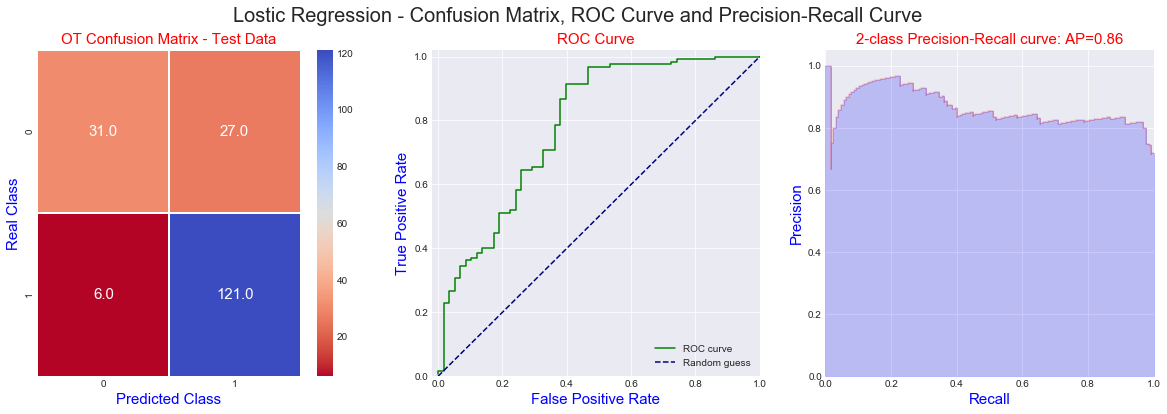

In [25]:
plot_CM_ROC_PR(logit,X_test,y_test, 'Lostic Regression')

In [26]:
model_metric, yt_pred, yv_pred = fill_model_metric(logit, X_train, X_test,'Logistic Regression')
model_metric

Model Name Train-Precision Test-Precision Train-ROC-AUC  \
0  Logistic Regression            0.79           0.82          0.80   

  Test-ROC-AUC Train-F1 Score Test-F1 Score  
0         0.78           0.87          0.88

In [27]:
knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

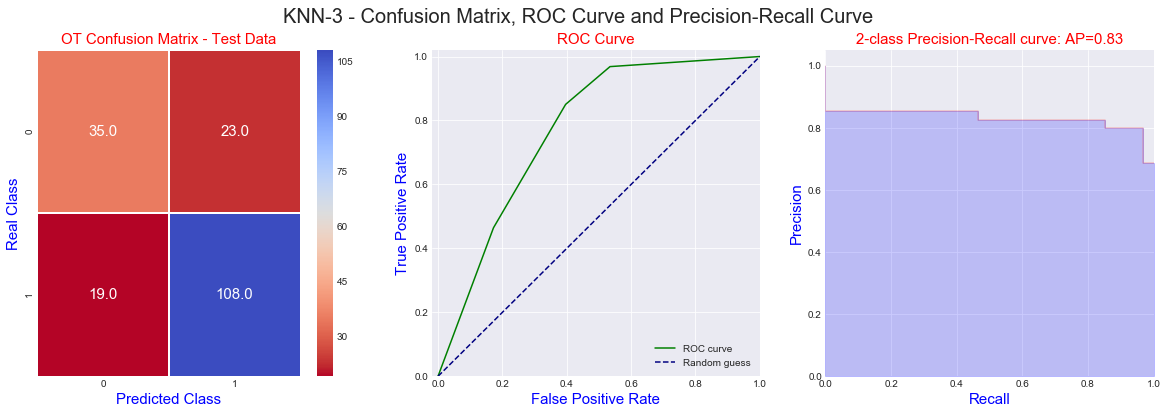

In [28]:
plot_CM_ROC_PR(knn,X_test,y_test, 'KNN-3')

In [29]:
model_metric, yt_pred, yv_pred = fill_model_metric(knn, X_train, X_test,'KNN-3')
model_metric

Model Name Train-Precision Test-Precision Train-ROC-AUC  \
0  Logistic Regression            0.79           0.82          0.80   
1                KNN-3            0.86           0.82          0.93   

  Test-ROC-AUC Train-F1 Score Test-F1 Score  
0         0.78           0.87          0.88  
1         0.77           0.91          0.84

In [30]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

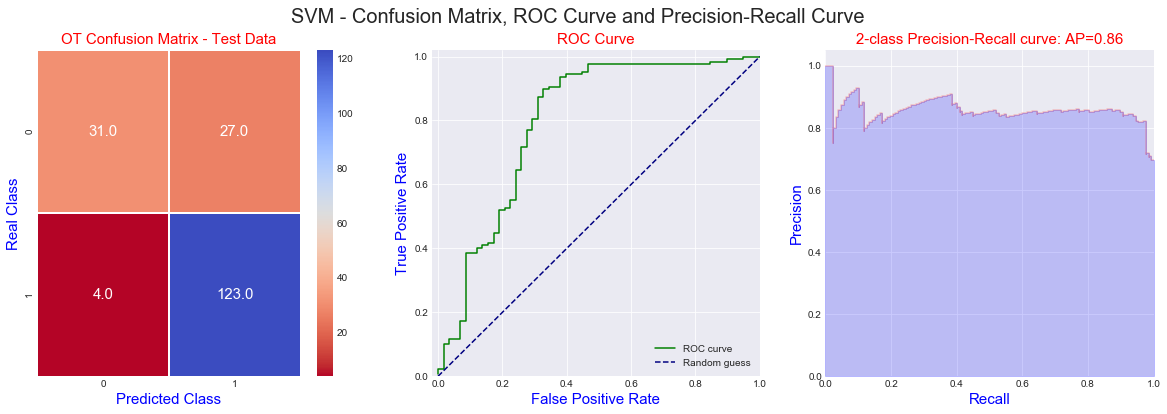

In [31]:
plot_CM_ROC_PR(svc,X_test,y_test, 'SVM')

In [32]:
model_metric, yt_pred, yv_pred = fill_model_metric(svc, X_train, X_test, 'SVC')
model_metric

Model Name Train-Precision Test-Precision Train-ROC-AUC  \
0  Logistic Regression            0.79           0.82          0.80   
1                KNN-3            0.86           0.82          0.93   
2                  SVC            0.78           0.82          0.87   

  Test-ROC-AUC Train-F1 Score Test-F1 Score  
0         0.78           0.87          0.88  
1         0.77           0.91          0.84  
2         0.80           0.87          0.89

In [33]:
#SVM With Hyper Parameters Tuning
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#making the instance
svc1=svm.SVC(probability=True)
#Hyper Parameters Set
params = {'C': list(np.arange(5,20,1)), 'kernel': ['linear','rbf']}
#Making models with hyper parameters sets
svc_tune = GridSearchCV(svc1, param_grid=params, n_jobs=-1)
#Learning
svc_tune.fit(X_train,y_train)
#The best hyper parameters set
print("SVM Best Hyper Parameters:\n",svc_tune.best_params_)

SVM Best Hyper Parameters:
 {'C': 5, 'kernel': 'linear'}


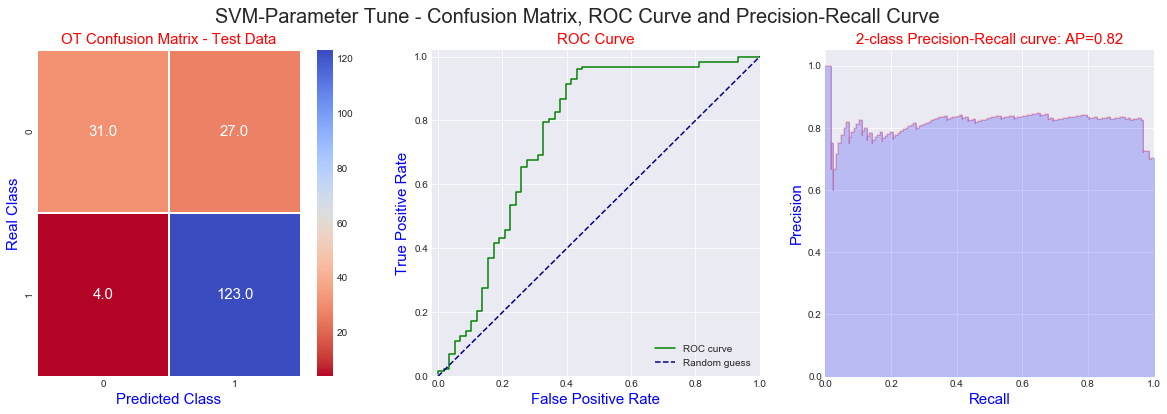

In [37]:
plot_CM_ROC_PR(svc_tune,X_test,y_test, 'SVM-Parameter Tune')

In [38]:
model_metric, yt_pred, yv_pred = fill_model_metric(svc_tune, X_train, X_test, 'SVM-Parameter Tune')
model_metric

Model Name Train-Precision Test-Precision Train-ROC-AUC  \
0  Logistic Regression            0.79           0.82          0.80   
1                KNN-3            0.86           0.82          0.93   
2                  SVC            0.78           0.82          0.87   
3   SVM-Parameter Tune            0.78           0.82          0.74   
4   SVM-Parameter Tune            0.78           0.82          0.74   

  Test-ROC-AUC Train-F1 Score Test-F1 Score  
0         0.78           0.87          0.88  
1         0.77           0.91          0.84  
2         0.80           0.87          0.89  
3         0.76           0.87          0.89  
4         0.76           0.87          0.89

In [39]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

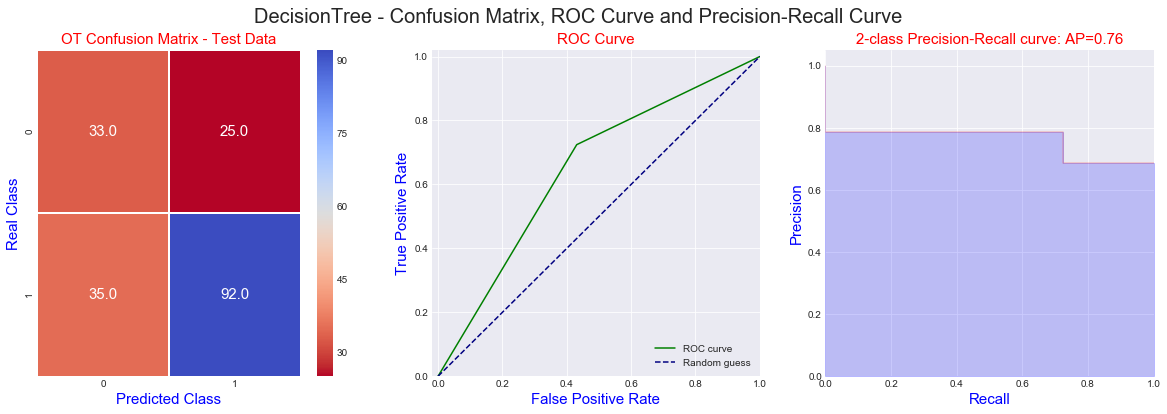

In [40]:
plot_CM_ROC_PR(DT,X_test,y_test, 'DecisionTree')

In [41]:
model_metric, yt_pred, yv_pred = fill_model_metric(DT, X_train, X_test, 'DecisionTree')
model_metric

Model Name Train-Precision Test-Precision Train-ROC-AUC  \
0  Logistic Regression            0.79           0.82          0.80   
1                KNN-3            0.86           0.82          0.93   
2                  SVC            0.78           0.82          0.87   
3   SVM-Parameter Tune            0.78           0.82          0.74   
4   SVM-Parameter Tune            0.78           0.82          0.74   
5         DecisionTree            1.00           0.79          1.00   

  Test-ROC-AUC Train-F1 Score Test-F1 Score  
0         0.78           0.87          0.88  
1         0.77           0.91          0.84  
2         0.80           0.87          0.89  
3         0.76           0.87          0.89  
4         0.76           0.87          0.89  
5         0.65           1.00          0.75

In [42]:
import sklearn.ensemble
rfc = sklearn.ensemble.RandomForestClassifier(n_estimators=200, 
                                                    min_samples_split=6,
                                                    criterion='gini', 
                                                    max_features='auto',
                                                    oob_score=True,
                                                    random_state=1,
                                                    n_jobs=-1)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

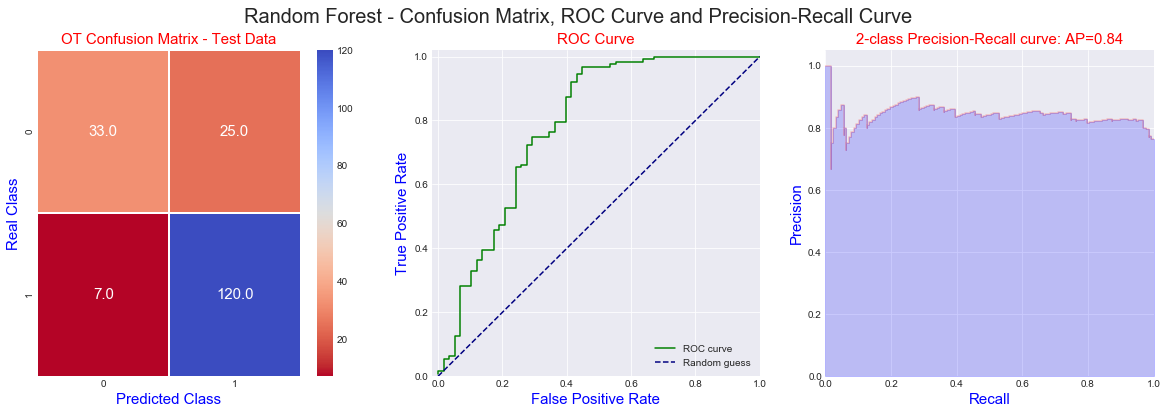

In [43]:
plot_CM_ROC_PR(rfc,X_test,y_test, 'Random Forest')

In [55]:
model_metric, yt_pred, yv_pred = fill_model_metric(rfc, X_train, X_test, 'Random Forest Classifier')
model_metric

Model Name Train-Precision Test-Precision Train-ROC-AUC  \
0       Logistic Regression            1.00           1.00          1.00   
1                     KNN-3            0.96           0.92          1.00   
2                       SVC            1.00           1.00          1.00   
3        SVM-Parameter Tune            1.00           1.00          1.00   
4              DecisionTree            1.00           1.00          1.00   
5  Random Forest Classifier            1.00           1.00          1.00   

  Test-ROC-AUC Train-F1 Score Test-F1 Score  
0         1.00           1.00          1.00  
1         0.96           0.97          0.94  
2         1.00           1.00          1.00  
3         1.00           1.00          1.00  
4         1.00           1.00          1.00  
5         1.00           1.00          1.00

In [44]:
import sklearn.ensemble
from pprint import pprint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_rscv = RandomForestClassifier(bootstrap=True, random_state = 42)

# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]
n_estimators = [int(x) for x in np.arange(100, 500, 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 6],
 'min_samples_split': [2, 5, 10, 15],
 'n_estimators': [100,
                  120,
                  140,
                  160,
                  180,
                  200,
                  220,
                  240,
                  260,
                  280,
                  300,
                  320,
                  340,
                  360,
                  380,
                  400,
                  420,
                  440,
                  460,
                  480]}


In [45]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfc_random = RandomizedSearchCV(estimator = rf_rscv, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rfc_random.fit(X_train, y_train)
# #The best hyper parameters set
print("Best Hyper Parameters:\n",rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=340, min_samples_split=15, min_samples_leaf=4, max_features=auto, max_depth=100 
[CV] n_estimators=340, min_samples_split=15, min_samples_leaf=4, max_features=auto, max_depth=100 
[CV] n_estimators=340, min_samples_split=15, min_samples_leaf=4, max_features=auto, max_depth=100 
[CV] n_estimators=220, min_samples_split=15, min_samples_leaf=6, max_features=sqrt, max_depth=70 
[CV]  n_estimators=220, min_samples_split=15, min_samples_leaf=6, max_features=sqrt, max_depth=70, total=   1.9s
[CV] n_estimators=220, min_samples_split=15, min_samples_leaf=6, max_features=sqrt, max_depth=70 
[CV]  n_estimators=340, min_samples_split=15, min_samples_leaf=4, max_features=auto, max_depth=100, total=   3.0s
[CV] n_estimators=220, min_samples_split=15, min_samples_leaf=6, max_features=sqrt, max_depth=70 
[CV]  n_estimators=340, min_samples_split=15, min_samples_leaf=4, max_features=auto, max_depth=100, total=   3.0s
[CV] 

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.6s


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=110, total=   1.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=110 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=110, total=   1.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=110 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=110, total=   1.1s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100, total=   1.2s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=100 
[CV]  n_estimators=480, min_samples_split=15, min_samples_leaf=2, max_features=auto, max_depth=110, total=   5.1s
[CV] n_estimators=100, min_samples_spli

[CV]  n_estimators=440, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, total=   5.9s
[CV] n_estimators=180, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=70 
[CV]  n_estimators=180, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=70, total=   2.1s
[CV] n_estimators=180, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=70 
[CV]  n_estimators=440, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, total=   5.4s
[CV] n_estimators=240, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=440, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, total=   5.5s
[CV] n_estimators=240, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=180, min_samples_split=2, min_samples_leaf=6, max_features=auto, max_depth=70, total=   1.9s
[CV] n_estimators=240, min_samples_split=10

[CV]  n_estimators=480, min_samples_split=15, min_samples_leaf=4, max_features=sqrt, max_depth=100, total=   4.8s
[CV] n_estimators=320, min_samples_split=15, min_samples_leaf=6, max_features=sqrt, max_depth=100 
[CV]  n_estimators=480, min_samples_split=15, min_samples_leaf=4, max_features=sqrt, max_depth=100, total=   4.6s
[CV] n_estimators=320, min_samples_split=15, min_samples_leaf=6, max_features=sqrt, max_depth=100 
[CV]  n_estimators=480, min_samples_split=15, min_samples_leaf=4, max_features=sqrt, max_depth=100, total=   4.7s
[CV] n_estimators=420, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100 
[CV]  n_estimators=320, min_samples_split=15, min_samples_leaf=6, max_features=sqrt, max_depth=100, total=   3.4s
[CV] n_estimators=420, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100 
[CV]  n_estimators=320, min_samples_split=15, min_samples_leaf=6, max_features=sqrt, max_depth=100, total=   3.2s
[CV] n_estimators=420, min_samples_s

[CV]  n_estimators=440, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   4.7s
[CV] n_estimators=360, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=70 
[CV]  n_estimators=360, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=70, total=   3.8s
[CV] n_estimators=360, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=70 
[CV]  n_estimators=440, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   4.5s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=440, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   4.5s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30 


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min


[CV]  n_estimators=360, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=70, total=   3.7s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=360, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=70, total=   3.7s
[CV] n_estimators=320, min_samples_split=15, min_samples_leaf=4, max_features=sqrt, max_depth=40 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, total=   4.1s
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, total=   4.1s
[CV] n_estimators=320, min_samples_split=15, min_samples_leaf=4, max_features=sqrt, max_depth=40 
[CV] n_estimators=320, min_samples_split=15, min_samples_leaf=4, max_features=sqrt, max_depth=40 
[CV]  n_estimators=320, min_samples_split=15, min_samples_leaf=4, max_features=sqrt, max_depth=40, total=   3.5s
[CV] n_estimators=180, min_samples_split=10, m

[CV]  n_estimators=160, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.7s
[CV] n_estimators=160, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=320, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, total=   3.4s
[CV] n_estimators=380, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=60 
[CV]  n_estimators=320, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, total=   3.4s
[CV] n_estimators=380, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=60 
[CV]  n_estimators=160, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.9s
[CV] n_estimators=380, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=60 
[CV]  n_estimators=160, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.8s
[CV] n_estimators=380, min_samples_split=5, min_s

[CV]  n_estimators=260, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=20, total=   2.5s
[CV] n_estimators=320, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=90 
[CV]  n_estimators=260, min_samples_split=5, min_samples_leaf=6, max_features=auto, max_depth=20, total=   2.5s
[CV] n_estimators=240, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=320, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=90, total=   3.2s
[CV] n_estimators=240, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=320, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=90, total=   2.8s
[CV] n_estimators=240, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=240, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=100, min_samples_split=2, min_samp

[CV]  n_estimators=140, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.4s
[CV] n_estimators=140, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=140, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.4s
[CV] n_estimators=360, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=140, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.2s
[CV] n_estimators=360, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=360, min_samples_split=15, min_samples_leaf=6, max_features=sqrt, max_depth=100, total=   3.3s
[CV]  n_estimators=360, min_samples_split=15, min_samples_leaf=6, max_features=sqrt, max_depth=100, total=   3.4s
[CV] n_estimators=360, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV] n_estimators=160, min_samples_split=

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.2min finished


Best Hyper Parameters:
 {'n_estimators': 340, 'min_samples_split': 15, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 100}


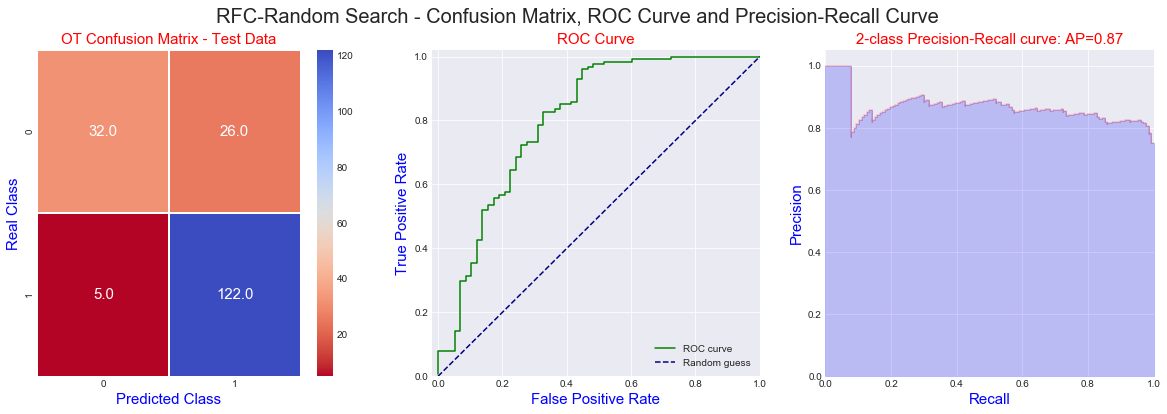

In [49]:
plot_CM_ROC_PR(rfc_random,X_test,y_test, 'RFC-Random Search')

In [50]:
model_metric, yt_pred, yv_pred = fill_model_metric(rfc_random, X_train, X_test, 'RFC-Random Search')
model_metric

Model Name Train-Precision Test-Precision Train-ROC-AUC  \
0  Logistic Regression            0.79           0.82          0.80   
1                KNN-3            0.86           0.82          0.93   
2                  SVC            0.78           0.82          0.87   
3   SVM-Parameter Tune            0.78           0.82          0.74   
4   SVM-Parameter Tune            0.78           0.82          0.74   
5         DecisionTree            1.00           0.79          1.00   
6    RFC-Random Search            0.80           0.82          0.94   
7    RFC-Random Search            0.80           0.82          0.94   

  Test-ROC-AUC Train-F1 Score Test-F1 Score  
0         0.78           0.87          0.88  
1         0.77           0.91          0.84  
2         0.80           0.87          0.89  
3         0.76           0.87          0.89  
4         0.76           0.87          0.89  
5         0.65           1.00          0.75  
6         0.80           0.88          0.89  
7         0.80           0.88          0.89

In [51]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

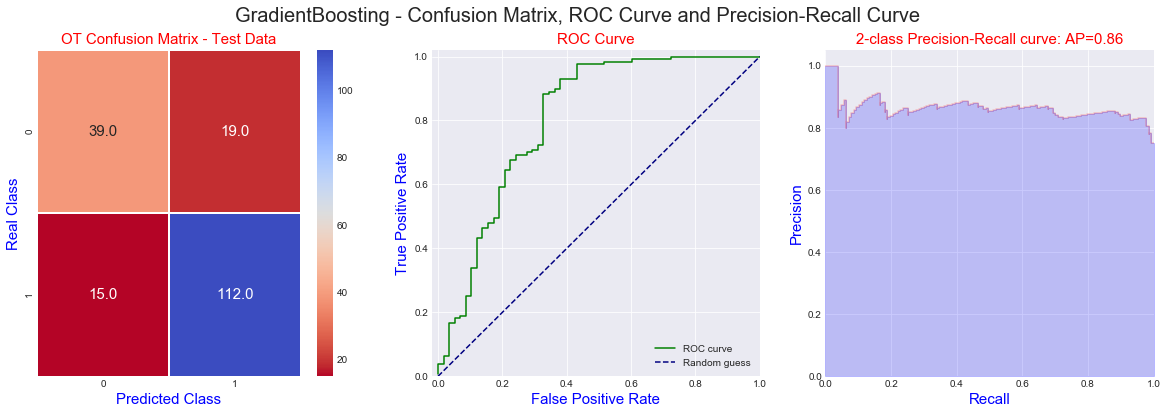

In [52]:
plot_CM_ROC_PR(gbc,X_test,y_test, 'GradientBoosting')

In [62]:
model_metric, yt_pred, yv_pred = fill_model_metric(gbc, X_train, X_test, 'GradientBoosting')
model_metric

Model Name Train-Precision Test-Precision Train-ROC-AUC  \
0       Logistic Regression            1.00           1.00          1.00   
1                     KNN-3            0.96           0.92          1.00   
2                       SVC            1.00           1.00          1.00   
3        SVM-Parameter Tune            1.00           1.00          1.00   
4              DecisionTree            1.00           1.00          1.00   
5  Random Forest Classifier            1.00           1.00          1.00   
6         RFC-Random Search            1.00           1.00          1.00   
7          GradientBoosting            1.00           1.00          1.00   

  Test-ROC-AUC Train-F1 Score Test-F1 Score  
0         1.00           1.00          1.00  
1         0.96           0.97          0.94  
2         1.00           1.00          1.00  
3         1.00           1.00          1.00  
4         1.00           1.00          1.00  
5         1.00           1.00          1.00  
6         1.00           1.00          1.00  
7         1.00           1.00          1.00

In [53]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



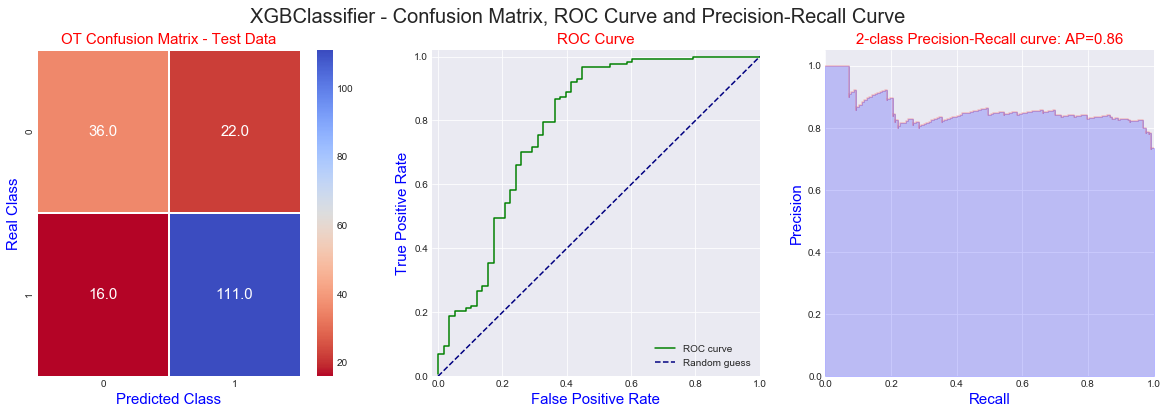

In [54]:
plot_CM_ROC_PR(xgb,X_test,y_test, 'XGBClassifier')

In [55]:
model_metric, yt_pred, yv_pred = fill_model_metric(xgb, X_train, X_test, 'XGBClassifier')
model_metric

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



Model Name Train-Precision Test-Precision Train-ROC-AUC  \
0  Logistic Regression            0.79           0.82          0.80   
1                KNN-3            0.86           0.82          0.93   
2                  SVC            0.78           0.82          0.87   
3   SVM-Parameter Tune            0.78           0.82          0.74   
4   SVM-Parameter Tune            0.78           0.82          0.74   
5         DecisionTree            1.00           0.79          1.00   
6    RFC-Random Search            0.80           0.82          0.94   
7    RFC-Random Search            0.80           0.82          0.94   
8        XGBClassifier            0.86           0.83          0.96   

  Test-ROC-AUC Train-F1 Score Test-F1 Score  
0         0.78           0.87          0.88  
1         0.77           0.91          0.84  
2         0.80           0.87          0.89  
3         0.76           0.87          0.89  
4         0.76           0.87          0.89  
5         0.65           1.00          0.75  
6         0.80           0.88          0.89  
7         0.80           0.88          0.89  
8         0.78           0.92          0.85

In [56]:
# Function for new graph
def importance_plotting(data, x, y, palette, title):
    sns.set(style="whitegrid")
    ft = sns.PairGrid(data, y_vars=y, x_vars=x, size=10, aspect=1.5)
    ft.map(sns.stripplot, orient='h', palette=palette, edgecolor="black", size=15)
    
    for ax, title in zip(ft.axes.flat, titles):
    # Set a different title for each axes
        ax.set(title=title)
    # Make the grid horizontal instead of vertical
        ax.xaxis.grid(False)
        ax.yaxis.grid(True)
    plt.show()

In [57]:
# Building feature importance into a DataFrame
fi = {'Features':X_train.columns.tolist(), 'Importance':xgb.feature_importances_}
importance = pd.DataFrame(fi, index=None).sort_values('Importance', ascending=False)

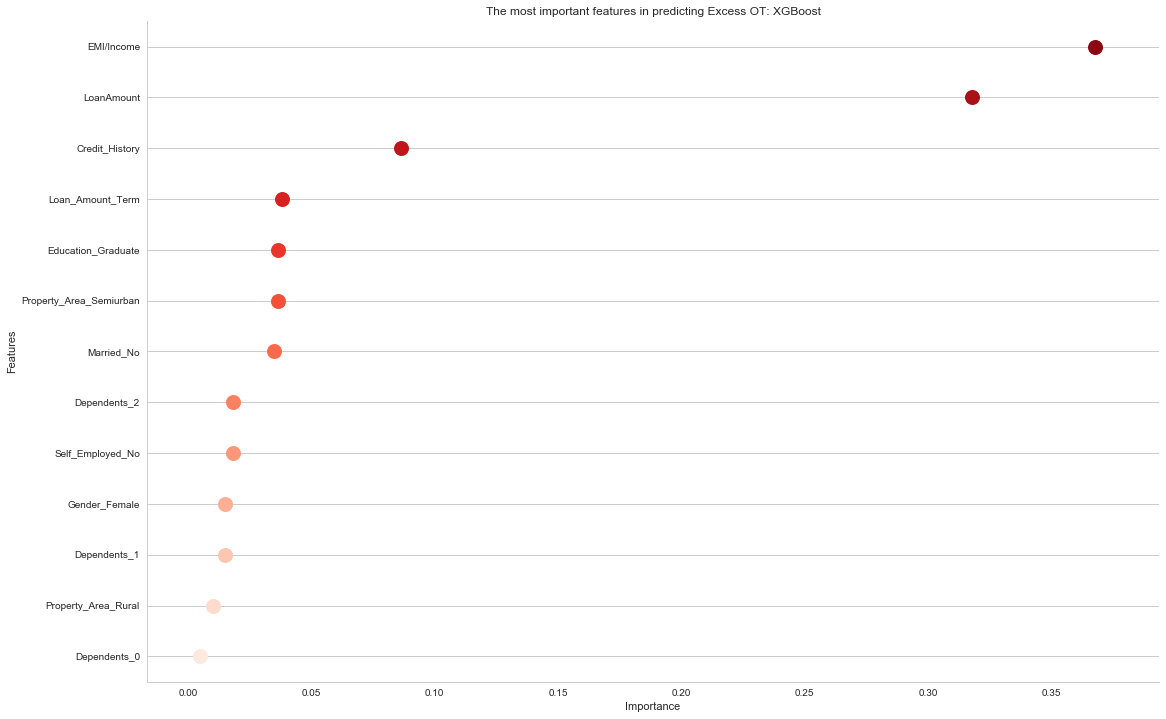

In [58]:
# Creating graph title
titles = ['The most important features in predicting Excess OT: XGBoost']

# Plotting graph
importance_plotting(importance, 'Importance', 'Features', 'Reds_r', titles)

In [59]:
xgb_imp = importance[importance.Importance > 0.008]
xgb_fields = xgb_imp.iloc[:,0] # first column of data frame (first_name)
xgb_train = X_train[(xgb_fields)]
xgb_test = X_test[(xgb_fields)]

In [60]:
# Getting feature importances for the 5 models where we can
gbc_imp = pd.DataFrame({'Feature':X_train.columns, 'gbc importance':gbc.feature_importances_})
xgb_imp = pd.DataFrame({'Feature':X_train.columns, 'xgb importance':xgb.feature_importances_})
ran_imp = pd.DataFrame({'Feature':X_train.columns, 'rfc importance':rfc.feature_importances_})
dtc_imp = pd.DataFrame({'Feature':X_train.columns, 'dtc importance':DT.feature_importances_})
# Merging results into a single dataframe
importances = gbc_imp.merge(xgb_imp, on='Feature').merge(ran_imp, on='Feature').merge(dtc_imp, on='Feature')

# Calculating average importance per feature
importances['Average'] = importances.mean(axis=1)

# Ranking top to bottom
importances = importances.sort_values(by='Average', ascending=False).reset_index(drop=True)

# Display
importances

Feature  gbc importance  xgb importance  rfc importance  \
0                EMI/Income            0.35            0.37            0.22   
1                LoanAmount            0.30            0.32            0.19   
2            Credit_History            0.14            0.09            0.33   
3          Loan_Amount_Term            0.03            0.04            0.04   
4        Education_Graduate            0.02            0.04            0.03   
5                Married_No            0.01            0.03            0.03   
6   Property_Area_Semiurban            0.02            0.04            0.03   
7          Self_Employed_No            0.03            0.02            0.02   
8              Dependents_1            0.03            0.01            0.02   
9       Property_Area_Rural            0.03            0.01            0.02   
10             Dependents_2            0.02            0.02            0.02   
11            Gender_Female            0.01            0.01            0.02   
12             Dependents_0            0.00            0.00            0.02   

    dtc importance  Average  
0             0.26     0.30  
1             0.21     0.25  
2             0.27     0.21  
3             0.05     0.04  
4             0.05     0.03  
5             0.04     0.03  
6             0.02     0.03  
7             0.03     0.02  
8             0.02     0.02  
9             0.01     0.02  
10            0.01     0.02  
11            0.01     0.01  
12            0.02     0.01

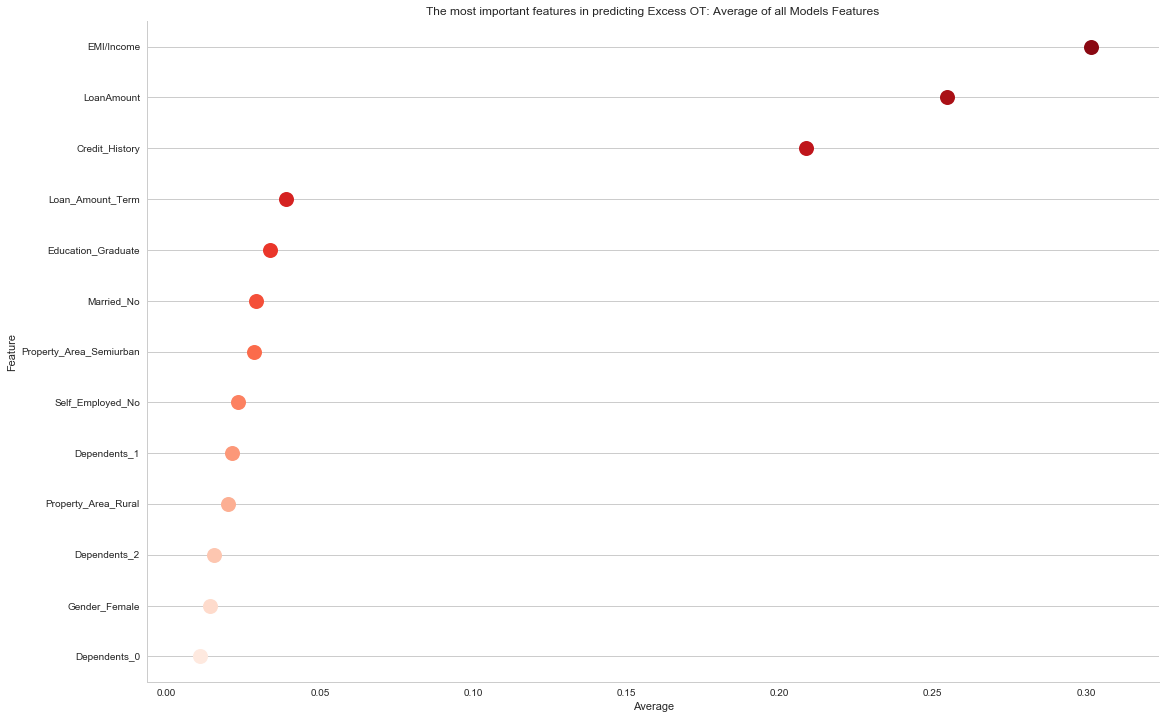

In [61]:
# Creating graph title
titles = ['The most important features in predicting Excess OT: Average of all Models Features']
# Plotting graph
importance_plotting(importances, 'Average', 'Feature', 'Reds_r', titles)